# DataSet

In [6]:
import pandas as pd
df = pd.read_csv('/Users/baby_cow/Desktop/AI/ML_competition/data/geocoded_addresses_27.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace = True)
df.columns

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/3789825727.py:2: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/baby_cow/Desktop/AI/ML_competition/data/geocoded_addresses_27.csv')


Index(['본번', '부번', '아파트명', '계약년월', '계약일', '층', '건축년도', '도로명', '거래유형', 'k-전체동수',
       'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '건축면적', '주차대수',
       'target', 'is_test', 'latitude', 'longitude', 'address', 'address_apt',
       'address_apt_sqm', '구', '동', '강남여부', 'mean_target', 'apt_mean_target',
       'address_mean_target', 'mean_target_gu_dong',
       'closest_bus_stop_distance', 'closest_subway_station_distance',
       'bus_stop_count_500m', 'subway_station_count_500m',
       'bus_stop_count_750m', 'subway_station_count_750m',
       'bus_stop_count_1000m', 'subway_station_count_1000m', 'square_meter',
       'monthly_mean_target_rate', 'adjusted_square_meter', 'is_outlier',
       'year', 'month', 'distance_to_lead_house', 'train_target',
       'preds_target', 'percentage_difference', '전용면적',
       'new_mean_target_apt_sqm', 'new_mean_target_apt',
       'new_mean_target_gu_dong', 'adjus

In [7]:
temp_index = list(range(len(df)))
df['id'] = temp_index

df['계약년'] = df['계약년월'].map(lambda x : int(str(x)[:4]))
df.drop(columns=['year'], axis = 1, inplace = True)

# Outlier 제거

In [9]:
df_train = df.loc[(df['is_test'] == 0) & (df['is_outlier'] == False) & 
(df['percentage_difference'] > -25) & 
(df['percentage_difference'] < 40), :]

df_test = df[df['is_test'] == 1]

df = pd.concat([df_train, df_test])

# 지역별 chunk 나누기

In [10]:
chunks = {}

regions = df['구'].unique()

for region in regions:
    chunk = df[df['구'] == region]
    chunk.sort_values(by='계약년월')
    chunks[region] = chunk

In [11]:
chunk = chunks['강남구'].query("is_test==1")

,본번,부번,아파트명,계약년월,계약일,층,건축년도,도로명,거래유형,k-전체동수,...,train_target,preds_target,percentage_difference,전용면적,new_mean_target_apt_sqm,new_mean_target_apt,new_mean_target_gu_dong,adjusted_target,id,계약년
1118822,658,1,개포6차우성,2023-07-01,26,5,1987,언주로 3,직거래,8.0,...,NaN,NaN,NaN,79.9700,201406.736412,184477.690777,184840.734298,NaN,1118822,2023
1118823,651,1,개포더샵트리에,2023-08-01,15,10,2021,개포로 311,중개거래,2.0,...,NaN,NaN,NaN,108.2017,NaN,240000.000000,184840.734298,NaN,1118823,2023
1118824,652,0,개포우성3차,2023-07-01,28,15,1984,개포로 307,중개거래,5.0,...,NaN,NaN,NaN,161.0000,337114.346367,265183.054930,184840.734298,NaN,1118824,2023
1118825,652,0,개포우성3차,2023-08-01,10,14,1984,개포로 307,중개거래,5.0,...,NaN,NaN,NaN,133.4600,281806.668437,265183.054930,184840.734298,NaN,1118825,2023
1118826,652,0,개포우성3차,2023-08-01,18,6,1984,개포로 307,중개거래,5.0,...,NaN,NaN,NaN,104.4300,211890.300877,265183.054930,184840.734298,NaN,1118826,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123928,742,0,디에이치포레센트,2023-08-01,12,7,2021,개포로110길 38,중개거래,4.0,...,NaN,NaN,NaN,84.9400,259802.231746,304002.897064,183286.075564,NaN,1123928,2023
1123929,742,0,디에이치포레센트,2023-08-01,19,6,2021,개포로110길 38,중개거래,4.0,...,NaN,NaN,NaN,84.9400,259802.231746,304002.897064,183286.075564,NaN,1123929,2023
1123930,742,0,디에이치포레센트,2023-08-01,31,9,2021,개포로110길 38,중개거래,4.0,...,NaN,NaN,NaN,84.9400,259802.231746,304002.897064,183286.075564,NaN,1123930,2023
1123931,734,0,상록수,2023-07-01,7,3,1993,광평로10길 15,중개거래,22.0,...,NaN,NaN,NaN,74.5400,182207.075817,190385.586118,183286.075564,NaN,1123931,2023


# 모델 학습

In [18]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

result_board = []
result = pd.DataFrame()

params = {
    'objective': 'regression', 
    'metric': 'rmse',           
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'lambda_l2' : 0.1,
    'drop_rate' : 0.2,
    'verbose' : -1
}

for region in tqdm(regions):
    chunk = chunks[region]

    select_cols = ['id','본번', '부번', '계약일', '층', '건축년도', 'k-전체동수',
        'k-전체세대수', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
        'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', '건축면적', '주차대수',
        'target', 'is_test', 'latitude', 'longitude', '강남여부',
        'address_mean_target', 'mean_target_gu_dong',
        'closest_bus_stop_distance', 'closest_subway_station_distance',
        'bus_stop_count_500m', 'subway_station_count_500m',
        'bus_stop_count_750m', 'subway_station_count_750m',
        'bus_stop_count_1000m', 'subway_station_count_1000m',
        'month', 'distance_to_lead_house','전용면적',
        'new_mean_target_apt_sqm', 'new_mean_target_apt',
        'new_mean_target_gu_dong']
    
    chunk = chunk[select_cols]

    train_chunk = chunk.query('is_test == 0')
    test_chunk = chunk.query('is_test == 1')

    train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
    test_chunk.drop(columns = ['is_test'], axis = 1, inplace = True)

    X = train_chunk.drop(columns=['target'], axis=1)
    y = train_chunk['target']

    tscv = TimeSeriesSplit(n_splits = 17)
    
    min_rmse = int(1e9)

    model = None
    for fold, (train_index, val_index) in enumerate(tscv.split(X), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        train_data = lgb.Dataset(X_train, label = y_train)
        val_data = lgb.Dataset(X_val, label = y_val, reference = train_data)

        if model :
            model = lgb.train(
                params,
                train_data,
                num_boost_round=5000,
                init_model = model,
                valid_sets = [train_data, val_data],
                callbacks = [lgb.early_stopping(stopping_rounds=5), lgb.log_evaluation(period=-1)],
            )
        else:
            model = lgb.train(
                params,
                train_data,
                num_boost_round=5000,
                valid_sets = [train_data, val_data],
                callbacks = [lgb.early_stopping(stopping_rounds=5), lgb.log_evaluation(period=-1)],
            )
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        min_rmse = min(min_rmse, rmse)

    result_board.append({"지역" : region, "validation RMSE" : min_rmse})

    final_train_data = lgb.Dataset(X, label=y)
    final_model = lgb.train(params,
                            final_train_data,
                            init_model = model,
                            num_boost_round=model.best_iteration,
                            callbacks = [lgb.log_evaluation(period=-1)],
                            )

    test_X = test_chunk.drop(columns=['id', 'target'], axis=1)
    pred = final_model.predict(test_X)

    test_chunk['target'] = pred

    result = pd.concat([result, test_chunk[['id', 'target']]]) 


  0%|          | 0/25 [00:00<?, ?it/s]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk.drop(columns = ['is_test'], axis = 1, inplace = True)


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	training's rmse: 14003.2	valid_1's rmse: 53099.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	training's rmse: 11553	valid_1's rmse: 15218.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	training's rmse: 12503.2	valid_1's rmse: 82279.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[87]	training's rmse: 20978.1	valid_1's rmse: 100265
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[149]	training's rmse: 27315.1	valid_1's rmse: 54465.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[159]	training's rmse: 28868.3	valid_1's rmse: 44074.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[160]	traini

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
  4%|▍         | 1/25 [00:07<03:09,  7.91s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	training's rmse: 9757.34	valid_1's rmse: 19691.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	training's rmse: 3378.76	valid_1's rmse: 7212.01
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	training's rmse: 4736.72	valid_1's rmse: 29782.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[94]	training's rmse: 5430.72	valid_1's rmse: 44233.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[110]	training's rmse: 10694.1	valid_1's rmse: 19488.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[129]	training's rmse: 10258.7	valid_1's rmse: 18942.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[130]	tra

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
  8%|▊         | 2/25 [00:14<02:48,  7.32s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[87]	training's rmse: 1187.8	valid_1's rmse: 6440.31
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[143]	training's rmse: 1389.56	valid_1's rmse: 3506.61
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[144]	training's rmse: 2235.01	valid_1's rmse: 32958
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[182]	training's rmse: 5348.71	valid_1's rmse: 19589.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[185]	training's rmse: 8355.98	valid_1's rmse: 15683
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[191]	training's rmse: 7288.65	valid_1's rmse: 11428.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[202]	train

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 12%|█▏        | 3/25 [00:19<02:16,  6.19s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	training's rmse: 2904.21	valid_1's rmse: 12066.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[50]	training's rmse: 3007.29	valid_1's rmse: 6075.66
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	training's rmse: 4096.89	valid_1's rmse: 40768.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[90]	training's rmse: 9697.62	valid_1's rmse: 24866
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[145]	training's rmse: 9759.34	valid_1's rmse: 9214.76
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[150]	training's rmse: 9437.04	valid_1's rmse: 14934.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[205]	train

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 16%|█▌        | 4/25 [00:28<02:31,  7.22s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	training's rmse: 2429.95	valid_1's rmse: 9588.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[56]	training's rmse: 2379.54	valid_1's rmse: 3981.92
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[57]	training's rmse: 2934.14	valid_1's rmse: 39081
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	training's rmse: 8013.71	valid_1's rmse: 11285.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	training's rmse: 8399.74	valid_1's rmse: 12085.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[141]	training's rmse: 7250.3	valid_1's rmse: 13169.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[142]	training

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 20%|██        | 5/25 [00:34<02:18,  6.93s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	training's rmse: 4717.63	valid_1's rmse: 20713.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	training's rmse: 4310.62	valid_1's rmse: 8347.02
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[68]	training's rmse: 5655.47	valid_1's rmse: 52389
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[89]	training's rmse: 11691.3	valid_1's rmse: 60343.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[125]	training's rmse: 12685.2	valid_1's rmse: 37270.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[135]	training's rmse: 13050.4	valid_1's rmse: 17346.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[136]	train

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 24%|██▍       | 6/25 [00:39<01:56,  6.16s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[76]	training's rmse: 1408.37	valid_1's rmse: 9194.23
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[104]	training's rmse: 2058.21	valid_1's rmse: 5834.51
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[150]	training's rmse: 2366.13	valid_1's rmse: 35019.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[184]	training's rmse: 6331.48	valid_1's rmse: 16509
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[196]	training's rmse: 6798.84	valid_1's rmse: 19467.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[238]	training's rmse: 6252.42	valid_1's rmse: 12345.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[287]	tr

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 28%|██▊       | 7/25 [00:50<02:16,  7.57s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[50]	training's rmse: 1469.95	valid_1's rmse: 6914.76
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	training's rmse: 4557.23	valid_1's rmse: 12676.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[87]	training's rmse: 2516.66	valid_1's rmse: 26187.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[108]	training's rmse: 6410.79	valid_1's rmse: 21837
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[110]	training's rmse: 10004.1	valid_1's rmse: 10923.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[122]	training's rmse: 6751.98	valid_1's rmse: 11300.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[138]	trai

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 32%|███▏      | 8/25 [00:54<01:52,  6.59s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	training's rmse: 1844.75	valid_1's rmse: 8225.99
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	training's rmse: 2528.29	valid_1's rmse: 3342.35
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[56]	training's rmse: 2735.95	valid_1's rmse: 35440.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[104]	training's rmse: 5614.18	valid_1's rmse: 25352.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[134]	training's rmse: 6468.44	valid_1's rmse: 17442
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[144]	training's rmse: 6916.9	valid_1's rmse: 14977.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[145]	train

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 36%|███▌      | 9/25 [01:06<02:10,  8.17s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	training's rmse: 1820.58	valid_1's rmse: 6622.65
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	training's rmse: 2286.58	valid_1's rmse: 6438.72
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	training's rmse: 2946.93	valid_1's rmse: 28978.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[89]	training's rmse: 6466.09	valid_1's rmse: 14763.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[126]	training's rmse: 5887.43	valid_1's rmse: 11729
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[141]	training's rmse: 5920.07	valid_1's rmse: 10810.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[142]	train

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 40%|████      | 10/25 [01:15<02:09,  8.61s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	training's rmse: 2029.13	valid_1's rmse: 9625.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	training's rmse: 2607.89	valid_1's rmse: 9281.08
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[116]	training's rmse: 2684.58	valid_1's rmse: 38571.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[160]	training's rmse: 9324.22	valid_1's rmse: 19775.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[195]	training's rmse: 10120.7	valid_1's rmse: 15433.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[216]	training's rmse: 9892.87	valid_1's rmse: 22647.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[238]	tr

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 44%|████▍     | 11/25 [01:24<02:02,  8.73s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	training's rmse: 3396.27	valid_1's rmse: 15932.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[105]	training's rmse: 2811.36	valid_1's rmse: 6342.82
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[112]	training's rmse: 3834.12	valid_1's rmse: 60810.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[169]	training's rmse: 11990.4	valid_1's rmse: 33049.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[177]	training's rmse: 13482.8	valid_1's rmse: 18031.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[186]	training's rmse: 12133.2	valid_1's rmse: 22211.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[189]	

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 48%|████▊     | 12/25 [01:32<01:50,  8.51s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[50]	training's rmse: 4619.82	valid_1's rmse: 16104.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[76]	training's rmse: 4432.51	valid_1's rmse: 6830.96
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[77]	training's rmse: 5213.21	valid_1's rmse: 58106.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[153]	training's rmse: 10388.2	valid_1's rmse: 35921.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[177]	training's rmse: 13349.1	valid_1's rmse: 18854.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[209]	training's rmse: 12576.4	valid_1's rmse: 19923.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[252]	tr

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 52%|█████▏    | 13/25 [01:41<01:44,  8.70s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[50]	training's rmse: 2680.25	valid_1's rmse: 9794.86
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[67]	training's rmse: 3072.01	valid_1's rmse: 9103.14
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[79]	training's rmse: 4312.04	valid_1's rmse: 49692.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[104]	training's rmse: 10542.6	valid_1's rmse: 24269.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[145]	training's rmse: 9894.91	valid_1's rmse: 16453.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[152]	training's rmse: 10062.9	valid_1's rmse: 21335.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[189]	tr

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 56%|█████▌    | 14/25 [01:50<01:35,  8.65s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	training's rmse: 15508.5	valid_1's rmse: 45560.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[86]	training's rmse: 7620.2	valid_1's rmse: 15507.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[88]	training's rmse: 10214.4	valid_1's rmse: 103940
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[160]	training's rmse: 24913.6	valid_1's rmse: 65165.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[227]	training's rmse: 26763.1	valid_1's rmse: 61802.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[279]	training's rmse: 26178.1	valid_1's rmse: 57667
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[340]	traini

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 60%|██████    | 15/25 [02:02<01:36,  9.65s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	training's rmse: 6610.14	valid_1's rmse: 16818
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[94]	training's rmse: 5099.8	valid_1's rmse: 6441.89
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[104]	training's rmse: 4870.94	valid_1's rmse: 81985.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[158]	training's rmse: 14650	valid_1's rmse: 42344.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[162]	training's rmse: 19096.6	valid_1's rmse: 32932.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[200]	training's rmse: 13797.2	valid_1's rmse: 17122.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[247]	traini

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 64%|██████▍   | 16/25 [02:11<01:26,  9.60s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	training's rmse: 2299.13	valid_1's rmse: 7006.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[59]	training's rmse: 2147.19	valid_1's rmse: 4936.53
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	training's rmse: 3230.38	valid_1's rmse: 35352.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[108]	training's rmse: 6238.85	valid_1's rmse: 30747.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[114]	training's rmse: 10789.9	valid_1's rmse: 12541.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[153]	training's rmse: 7805.57	valid_1's rmse: 14626.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[185]	tra

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 68%|██████▊   | 17/25 [02:20<01:15,  9.42s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	training's rmse: 6974.54	valid_1's rmse: 27578.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[58]	training's rmse: 5337.37	valid_1's rmse: 11896.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[59]	training's rmse: 7729.59	valid_1's rmse: 39761
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[107]	training's rmse: 11486.6	valid_1's rmse: 82099.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[157]	training's rmse: 17644.3	valid_1's rmse: 29260.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[192]	training's rmse: 17346.5	valid_1's rmse: 26574.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[244]	trai

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 72%|███████▏  | 18/25 [02:31<01:08,  9.79s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	training's rmse: 10729.8	valid_1's rmse: 15772.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	training's rmse: 3866.07	valid_1's rmse: 9740.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	training's rmse: 5379.07	valid_1's rmse: 24975
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[86]	training's rmse: 4611.44	valid_1's rmse: 58748.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[132]	training's rmse: 6821.59	valid_1's rmse: 32095.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[139]	training's rmse: 9548.06	valid_1's rmse: 31798.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[146]	traini

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 76%|███████▌  | 19/25 [02:37<00:52,  8.70s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[35]	training's rmse: 3968.87	valid_1's rmse: 14110.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[112]	training's rmse: 2927.34	valid_1's rmse: 6804.43
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[115]	training's rmse: 4226.32	valid_1's rmse: 47600.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[191]	training's rmse: 10162.5	valid_1's rmse: 47358.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[239]	training's rmse: 12716.9	valid_1's rmse: 21242
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[277]	training's rmse: 12180.8	valid_1's rmse: 18292.9
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[282]	tr

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 80%|████████  | 20/25 [02:49<00:47,  9.54s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	training's rmse: 5430.13	valid_1's rmse: 72342.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[95]	training's rmse: 8137.86	valid_1's rmse: 21519.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[96]	training's rmse: 13342.3	valid_1's rmse: 69420.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[119]	training's rmse: 18690.3	valid_1's rmse: 100185
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[130]	training's rmse: 27906.5	valid_1's rmse: 46475.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[171]	training's rmse: 21917.4	valid_1's rmse: 25144.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[183]	tra

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 84%|████████▍ | 21/25 [02:54<00:32,  8.22s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	training's rmse: 1979.43	valid_1's rmse: 7599.24
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[80]	training's rmse: 2282.07	valid_1's rmse: 5094.81
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[81]	training's rmse: 3332.59	valid_1's rmse: 28540
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[137]	training's rmse: 4675.59	valid_1's rmse: 27462.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[160]	training's rmse: 6365.72	valid_1's rmse: 17455.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[193]	training's rmse: 5962.83	valid_1's rmse: 11894.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[219]	trai

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 88%|████████▊ | 22/25 [03:02<00:24,  8.32s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[58]	training's rmse: 3309.37	valid_1's rmse: 13364.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[111]	training's rmse: 4066.58	valid_1's rmse: 11451.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[116]	training's rmse: 6057.71	valid_1's rmse: 40722.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[176]	training's rmse: 7529.97	valid_1's rmse: 32197.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[189]	training's rmse: 10047	valid_1's rmse: 18892.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[211]	training's rmse: 8585.45	valid_1's rmse: 12209
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[257]	trai

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 92%|█████████▏| 23/25 [03:07<00:14,  7.20s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	training's rmse: 3644.41	valid_1's rmse: 11623.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	training's rmse: 5416.05	valid_1's rmse: 21831.1
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[92]	training's rmse: 8225.57	valid_1's rmse: 35527.4
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[158]	training's rmse: 7432.18	valid_1's rmse: 20672.2
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[168]	training's rmse: 8851.89	valid_1's rmse: 18132.6
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[206]	training's rmse: 7786.36	valid_1's rmse: 9426.61
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[227]	tr

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
 96%|█████████▌| 24/25 [03:13<00:06,  6.81s/it]/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_chunk.drop(columns=['is_test', 'id'], axis=1, inplace = True)
/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	training's rmse: 2874.34	valid_1's rmse: 5743.85
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	training's rmse: 2185.49	valid_1's rmse: 5672.01
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	training's rmse: 3491.44	valid_1's rmse: 26875.3
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[104]	training's rmse: 4292.28	valid_1's rmse: 23223.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[105]	training's rmse: 10208.3	valid_1's rmse: 10413.8
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[131]	training's rmse: 4769.93	valid_1's rmse: 15751.7
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[146]	tr

/var/folders/2k/0xqbdwyx3fl_nkksxt394mqw0000gn/T/ipykernel_36207/716438673.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chunk['target'] = pred
100%|██████████| 25/25 [03:20<00:00,  8.01s/it]


# 결과 확인

In [19]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'  # MacOS의 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

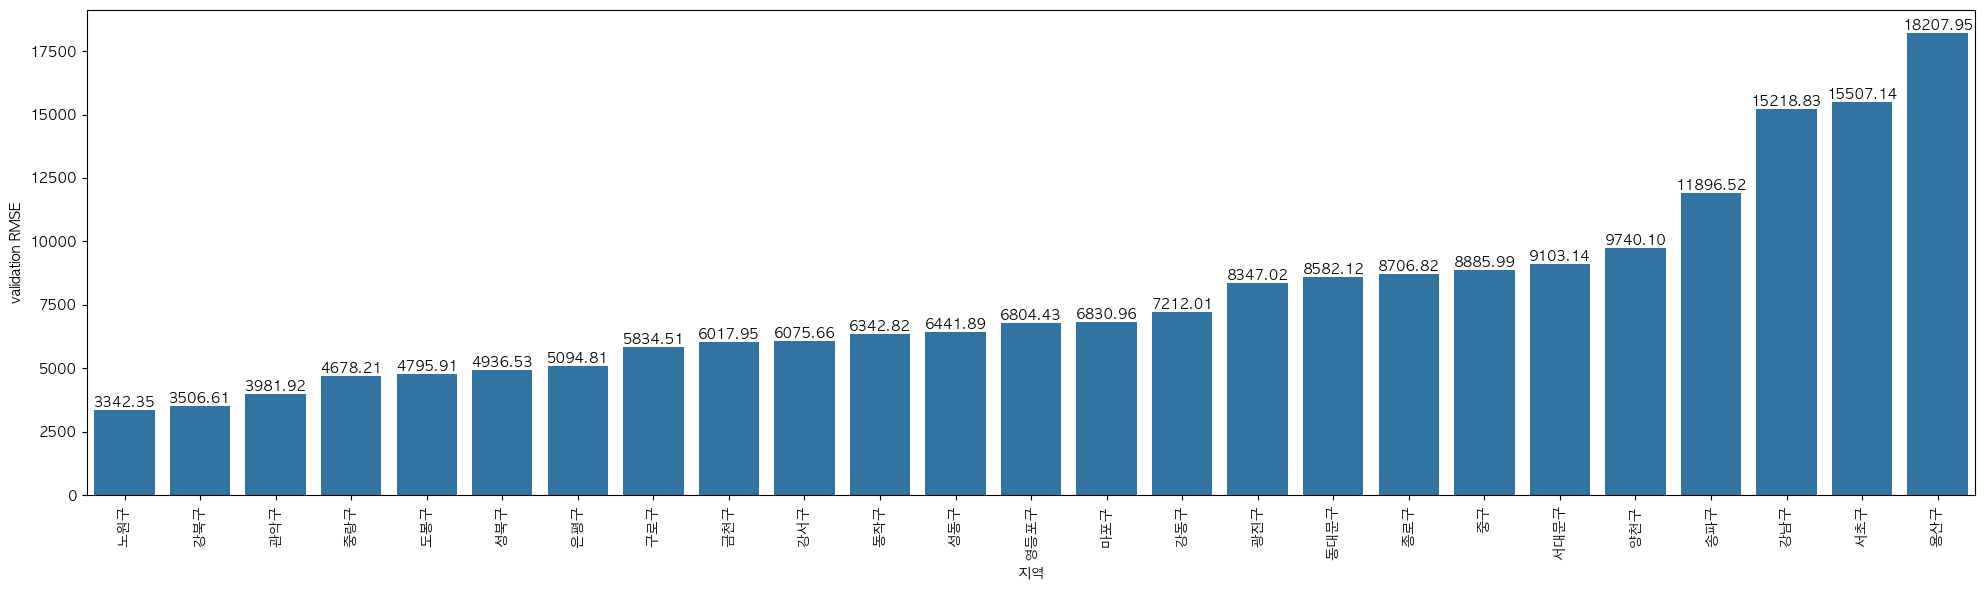

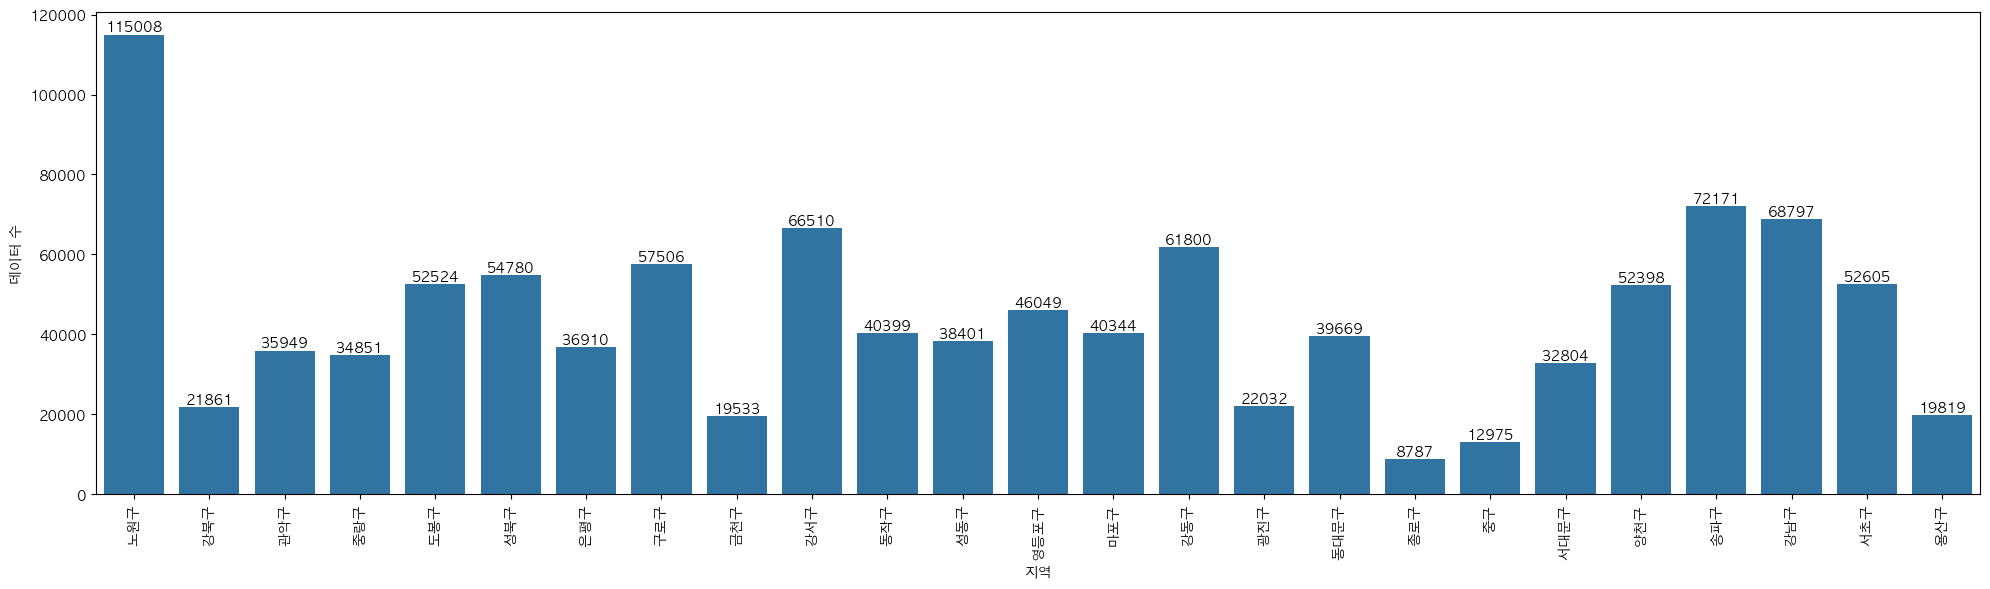

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

result_df = pd.DataFrame(result_board)
result_df = result_df.sort_values(by='validation RMSE')
result_df = result_df[-30:]

# 그래프 생성
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=result_df, x='지역', y='validation RMSE')

# 바 위에 값 표시
for i, v in enumerate(result_df['validation RMSE']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


temp_list = [{"지역" : region, "데이터 수" : len(chunks[region].query("is_test == 0"))} for region in result_df['지역']]
temp_df = pd.DataFrame(temp_list)

plt.figure(figsize=(20, 6))
ax = sns.barplot(data = temp_df, x='지역', y='데이터 수')

# 바 위에 값 표시
for i, v in enumerate(temp_df['데이터 수']):
    ax.text(i, v, f'{v}', ha='center', va='bottom')

plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [21]:
submit = result.sort_values(by = 'id')

display(submit)
print(submit.isnull().sum())

submit['target'] = submit['target'] * 1.065
submit['target'] = submit['target'].astype(int)
submit.to_csv('region_devision_apply_rate_for_mean_target.csv', index=False)

,id,target
1118822,1118822,132141.365195
1118823,1118823,93398.955651
1118824,1118824,188391.420859
1118825,1118825,140527.203337
1118826,1118826,100194.465331
...,...,...
1128089,1128089,42318.118035
1128090,1128090,35131.959082
1128091,1128091,46667.168343
1128092,1128092,38453.299330


id        0
target    0
dtype: int64


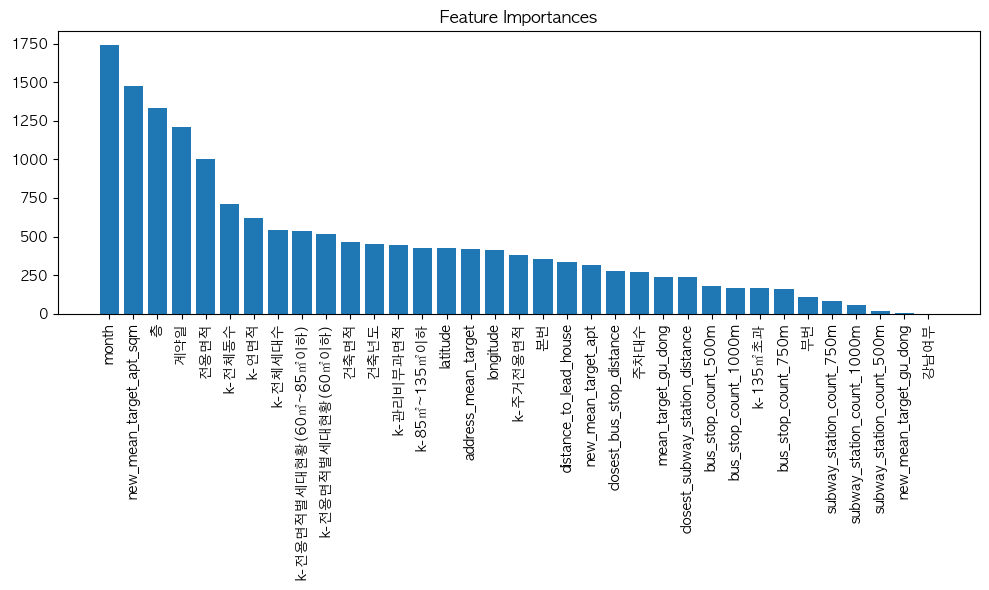

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도와 특성 이름 가져오기
importances = model.feature_importance()

feature_names = X.columns  # X는 특성 데이터프레임

# 중요도에 따라 특성 정렬
indices = np.argsort(importances)[::-1]

# 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()